In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline

In [2]:
subs=['sub-075', 'sub-131', 'sub-190', 'sub-201', 'sub-235', 'sub-244',
       'sub-249', 'sub-254', 'sub-255', 'sub-256', 'sub-257', 'sub-258',
       'sub-259', 'sub-260', 'sub-261', 'sub-262', 'sub-263', 'sub-264',
       'sub-265', 'sub-266', 'sub-267', 'sub-268', 'sub-269', 'sub-270',
       'sub-271']

layer_names=['layer_'+str(i)+"_activations" for i in range(0,13)]
layer_names.append('21st_year_bert-base-uncased_semantic_composition')
layer_names.append('21st_year_bert-base-uncased_syntactic_complexity')
layer_names.append('21st_year_bert-base-uncased_syntactic_distance')

d='/jukebox/griffiths/bert-brains/'
results_prefix=d+'results/21st_year/'
result_dirs=[results_prefix+"encoding-"+layer_name+"/" for layer_name in layer_names]

In [9]:
mask=nib.load(d+"21styear_data/whole_brain_mask.nii.gz").get_fdata().astype('bool')
def get_result(result_dir,threshold=0.95):
    p_value_nii=nib.load(result_dir+"OneSampT_tfce_corrp_tstat1.nii.gz")
    affine=p_value_nii.affine
    p_value_volume=p_value_nii.get_fdata()
    result_volume=np.mean([nib.load(result_dir+sub+"_whole_brain_encoding.nii.gz").get_fdata() for sub in subs],axis=0)
    binary_volume=p_value_volume>=threshold
    result_volume=result_volume*binary_volume
    return nib.Nifti1Image(result_volume,affine)

    
    
    
    
    
    
    
    
    

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 2400x1600 with 0 Axes>

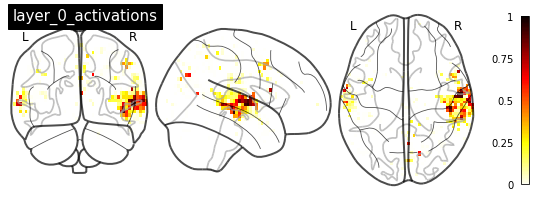

<Figure size 2400x1600 with 0 Axes>

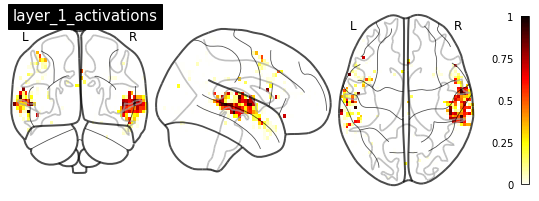

<Figure size 2400x1600 with 0 Axes>

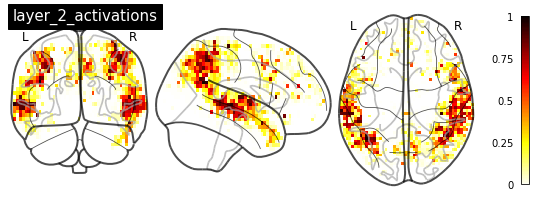

<Figure size 2400x1600 with 0 Axes>

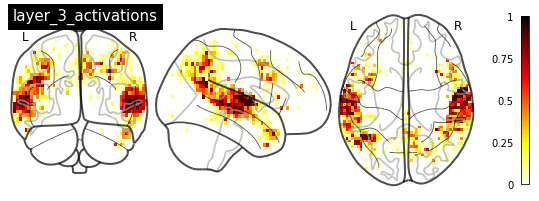

<Figure size 2400x1600 with 0 Axes>

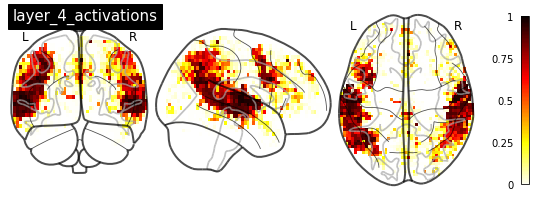

<Figure size 2400x1600 with 0 Axes>

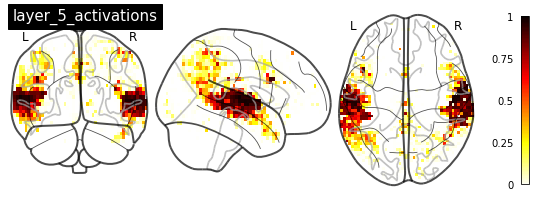

<Figure size 2400x1600 with 0 Axes>

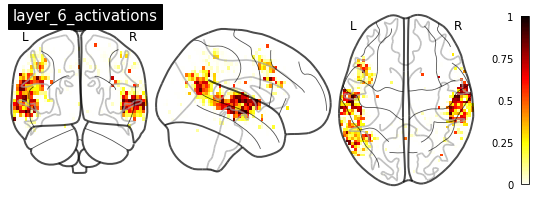

<Figure size 2400x1600 with 0 Axes>

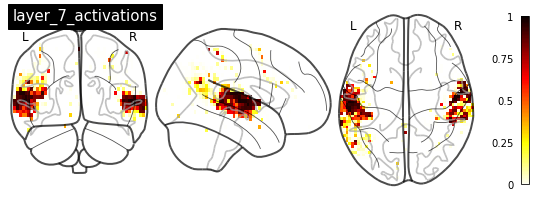

<Figure size 2400x1600 with 0 Axes>

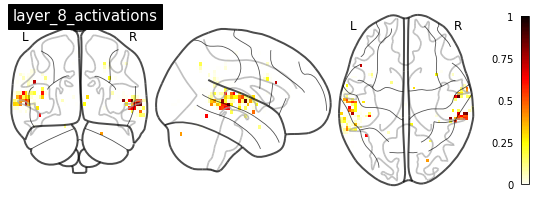

<Figure size 2400x1600 with 0 Axes>

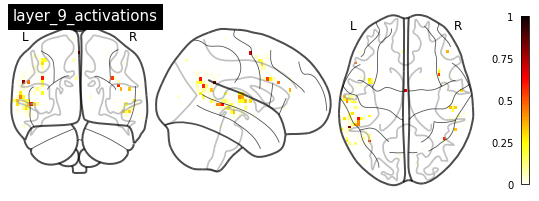

<Figure size 2400x1600 with 0 Axes>

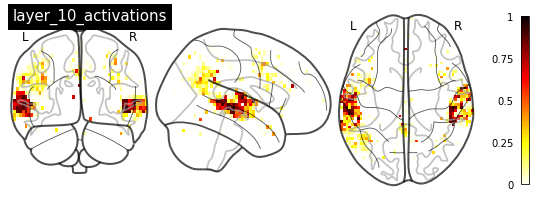

<Figure size 2400x1600 with 0 Axes>

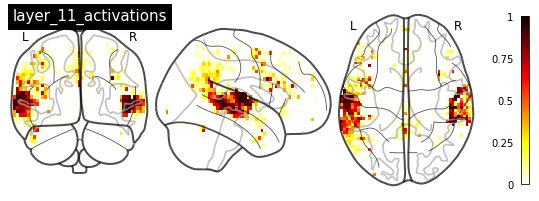

<Figure size 2400x1600 with 0 Axes>

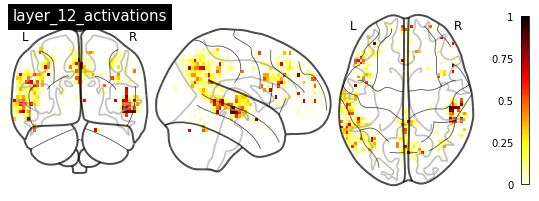

<Figure size 2400x1600 with 0 Axes>

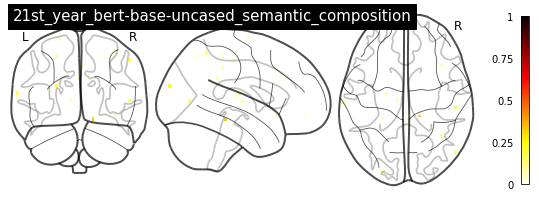

<Figure size 2400x1600 with 0 Axes>

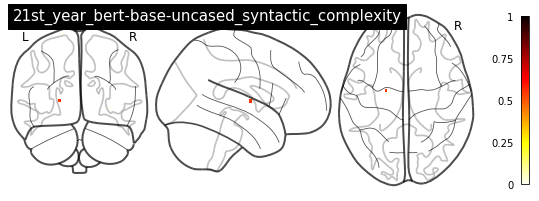

<Figure size 2400x1600 with 0 Axes>

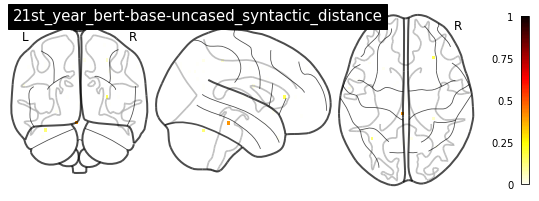

In [15]:
#Raw 1-pvalues
for i,result_dir in enumerate(result_dirs):
    fig=plt.figure(dpi=400)
    niplt.plot_glass_brain(result_dir+"OneSampT_tfce_corrp_tstat1.nii.gz",colorbar=True,vmax=1,title=layer_names[i])

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 2400x1600 with 0 Axes>

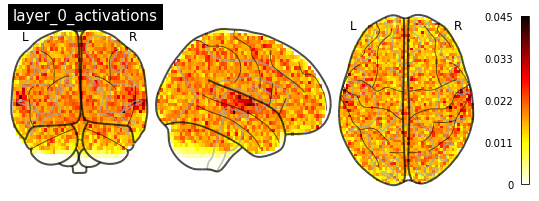

<Figure size 2400x1600 with 0 Axes>

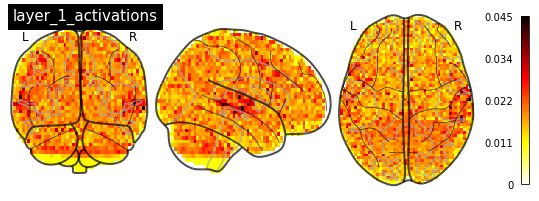

<Figure size 2400x1600 with 0 Axes>

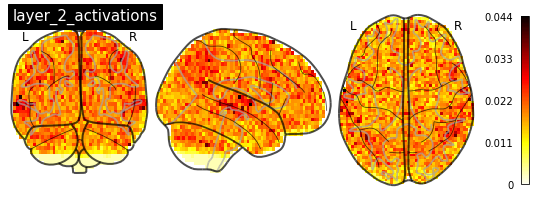

<Figure size 2400x1600 with 0 Axes>

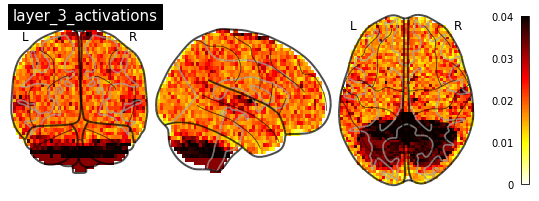

<Figure size 2400x1600 with 0 Axes>

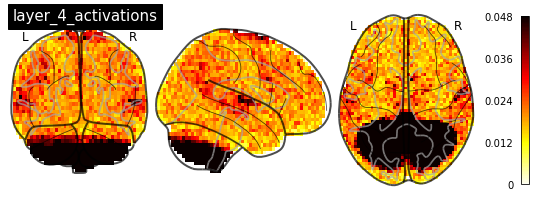

<Figure size 2400x1600 with 0 Axes>

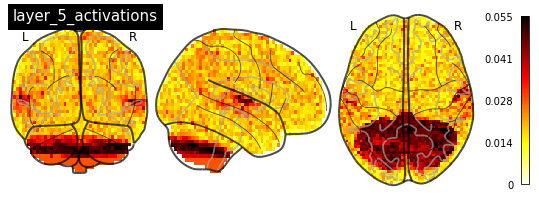

<Figure size 2400x1600 with 0 Axes>

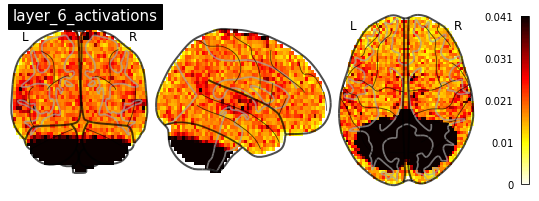

<Figure size 2400x1600 with 0 Axes>

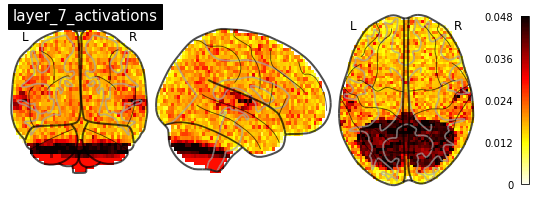

<Figure size 2400x1600 with 0 Axes>

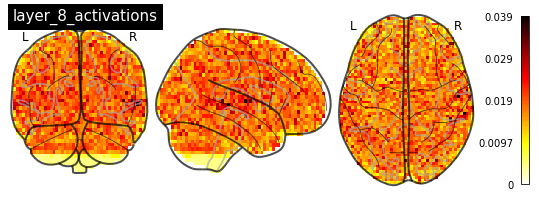

<Figure size 2400x1600 with 0 Axes>

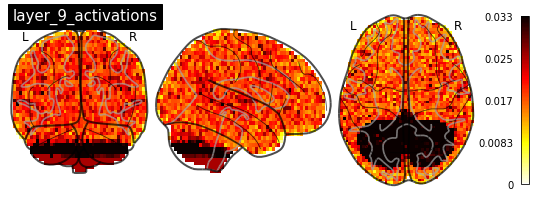

<Figure size 2400x1600 with 0 Axes>

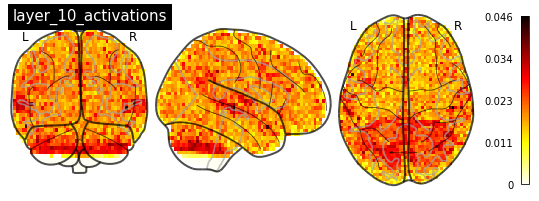

<Figure size 2400x1600 with 0 Axes>

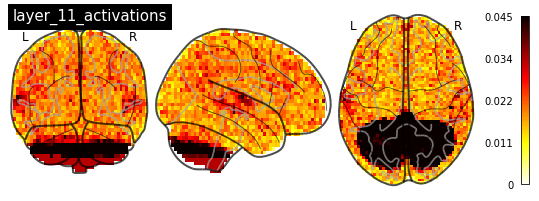

<Figure size 2400x1600 with 0 Axes>

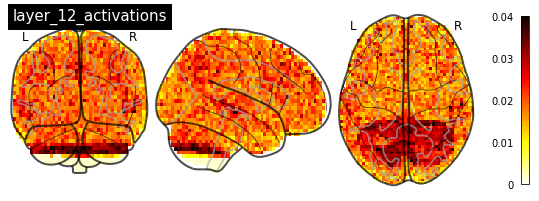

<Figure size 2400x1600 with 0 Axes>

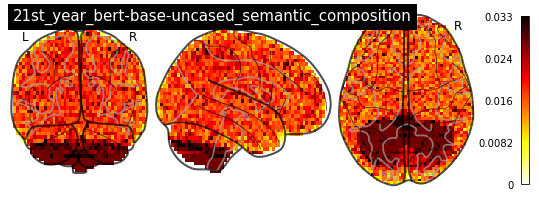

<Figure size 2400x1600 with 0 Axes>

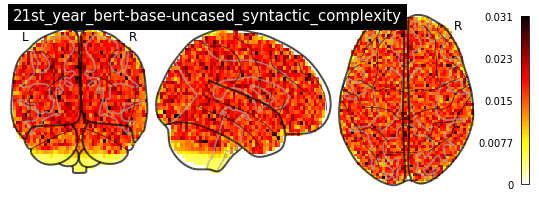

<Figure size 2400x1600 with 0 Axes>

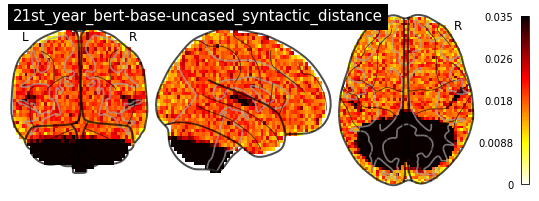

In [17]:
#Raw performances 
for i,result_dir in enumerate(result_dirs):
    fig=plt.figure(dpi=400)
    niplt.plot_glass_brain(get_result(result_dir,threshold=0),colorbar=True,title=layer_names[i])

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 2400x1600 with 0 Axes>

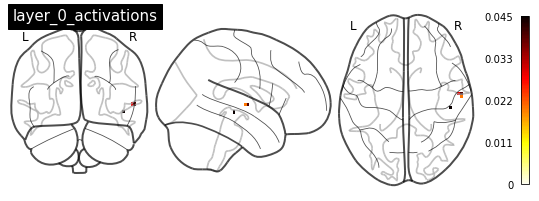

<Figure size 2400x1600 with 0 Axes>

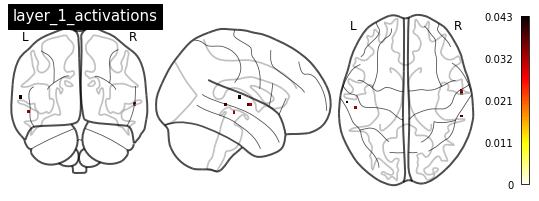

<Figure size 2400x1600 with 0 Axes>

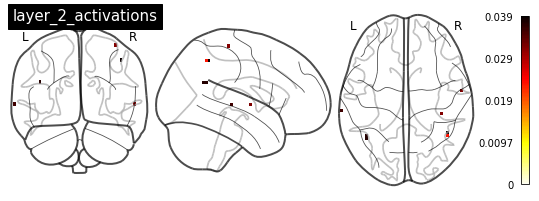

<Figure size 2400x1600 with 0 Axes>

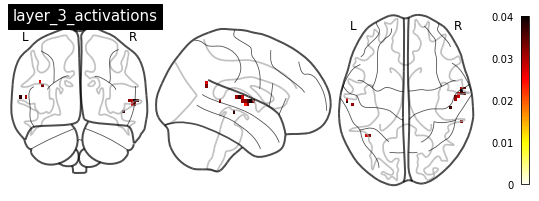

<Figure size 2400x1600 with 0 Axes>

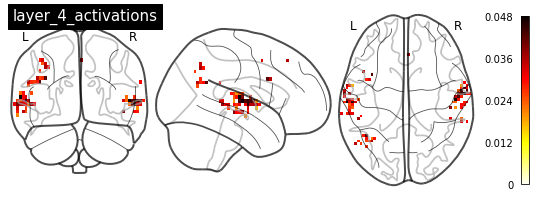

<Figure size 2400x1600 with 0 Axes>

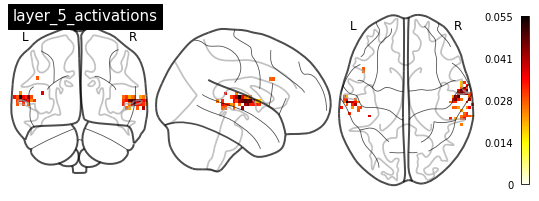

<Figure size 2400x1600 with 0 Axes>

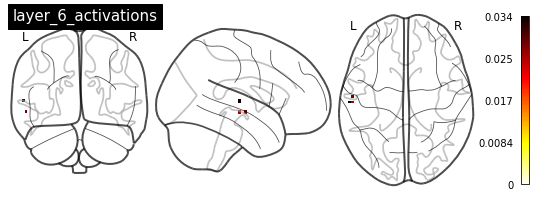

<Figure size 2400x1600 with 0 Axes>

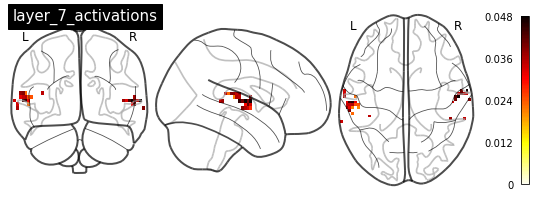

<Figure size 2400x1600 with 0 Axes>

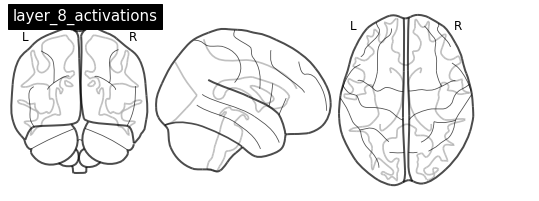

<Figure size 2400x1600 with 0 Axes>

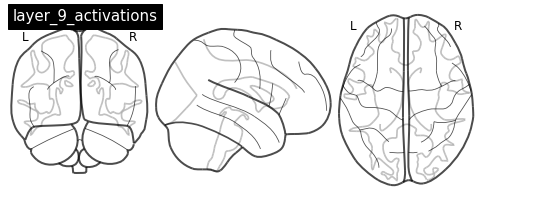

<Figure size 2400x1600 with 0 Axes>

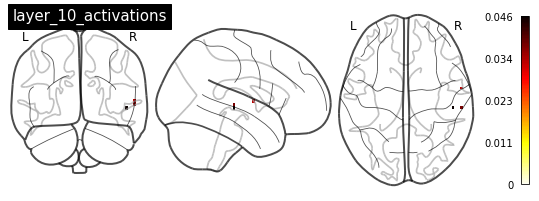

<Figure size 2400x1600 with 0 Axes>

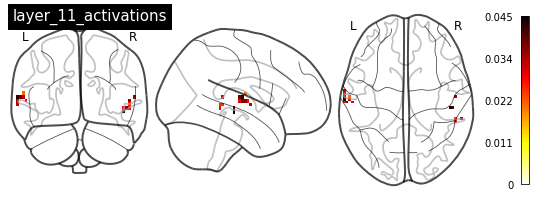

<Figure size 2400x1600 with 0 Axes>

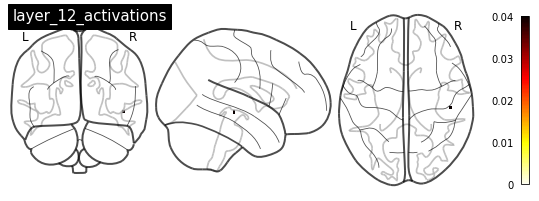

<Figure size 2400x1600 with 0 Axes>

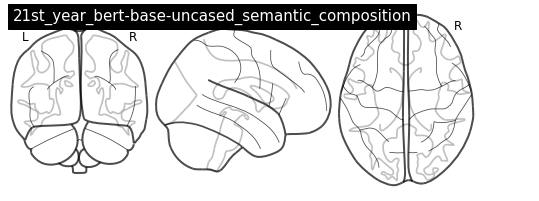

<Figure size 2400x1600 with 0 Axes>

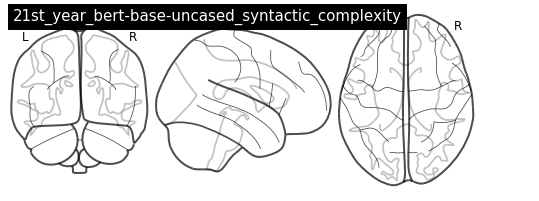

<Figure size 2400x1600 with 0 Axes>

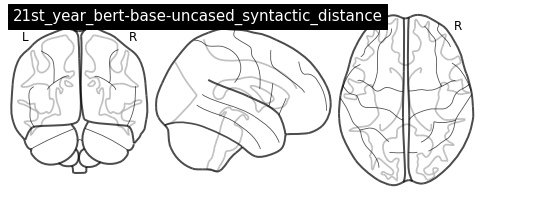

In [16]:
#Raw performances with p<0.1 threshold
for i,result_dir in enumerate(result_dirs):
    fig=plt.figure(dpi=400)
    niplt.plot_glass_brain(get_result(result_dir,threshold=0.9),colorbar=True,title=layer_names[i])

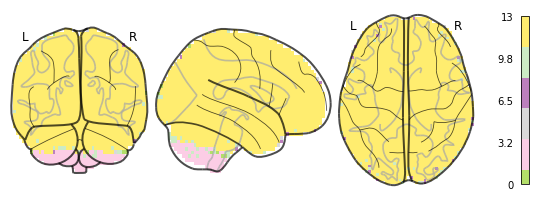

In [62]:
#Layer preference map based on mean performance

mean_volumes=[np.mean([nib.load(result_dir+sub+"_whole_brain_encoding.nii.gz").get_fdata() for sub in subs],axis=0) for result_dir in result_dirs[:13]]
sub=subs[0]
affine=nib.load(result_dir+sub+"_whole_brain_encoding.nii.gz").affine
mean_volumes=np.asarray(mean_volumes)
preference_map=np.argmax(mean_volumes,axis=0)
preference_map[mask]+=1
preference_volume=nib.Nifti1Image(preference_map,affine)
niplt.plot_glass_brain(preference_volume,colorbar=True,cmap='Set3')

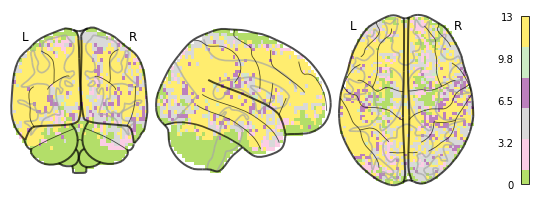

In [63]:
#Layer preference map based on p-value

mean_volumes=[nib.load(result_dir+"OneSampT_tfce_corrp_tstat1.nii.gz").get_fdata() for result_dir in result_dirs[:13]]
sub=subs[0]
affine=nib.load(result_dir+sub+"_whole_brain_encoding.nii.gz").affine
mean_volumes=np.asarray(mean_volumes)
preference_map=np.argmax(mean_volumes,axis=0)
preference_map[mask]+=1
preference_volume=nib.Nifti1Image(preference_map,affine)
niplt.plot_glass_brain(preference_volume,colorbar=True,cmap='Set3',cut_coords=(0,-18,13))